In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine


from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [17]:
# ref from 2segp github
# Classification dataset names - choose from following datasets 

CLASS_DATASET_NAMES = ['bcw','heart','iono','parks','sonar']
dataset_name = CLASS_DATASET_NAMES[0]


# Load the dataset
Xy = np.genfromtxt('test_data/'+dataset_name+'.csv', delimiter=',')
X = Xy[:, :-1]
y = Xy[:, -1]   # last column is the label

# simple operators

boost_num = 1000

seed = np.random.randint(9999999)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# model

In [18]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

def initial(y_one_hot):
    init_log_odds = np.sum(y_one_hot,axis=0)/y_one_hot.shape[0]
    
    init_p = np.exp(init_log_odds)
    init_p = init_p/(1+init_p)

    return init_log_odds,init_p

def initial_first_bin(init_log_odds,init_p,X):
    log_odds = np.repeat(init_log_odds,X.shape[0],0)
    p = np.repeat(init_p,X.shape[0],0)
    
    return log_odds,p
    
def update_log_p(grads,log_odds,p,learning_rate):
    log_odds_1 = log_odds + learning_rate * grads
    
    p_1 = np.exp(log_odds_1,where=log_odds_1 < 16,out=np.zeros(log_odds_1.shape)+16)
    p_1 = np.divide(p_1,(1+p_1),where=p_1 < 16,out=np.ones(p_1.shape))
    
    # p_1 = np.exp(log_odds_1)
    # p_1 = np.divide(p_1,(1+p_1))

    return log_odds_1,p_1

def predict(X,init_log_odds,init_p,learning_rate,stack):
    log_odds,p = initial_first_bin(init_log_odds,init_p,X)

    for node in stack:
        grads = node.predict_grad(X)
        
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)
    return p

In [19]:
train_acc = []
test_acc = []

stack = []

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

init_log_odds,init_p = initial(y_train_one_hot)
log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)

test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

In [40]:
learning_rate = 0.1
bins = 2
lam = 3
stack = []
losses = []
num_features = X_train.shape[1]

max_depth = 1
tolerance = 0.04


total_size = 10
elite_size = 10

eg = Engine(Functions.simple_opset,X_train,y_train,y_train_one_hot,learning_rate,bins,max_depth,lam)
eg.initialize_nodes(log_odds,p)
origin_features = eg.nodes.copy()
origin_losses = eg.losses.copy()
stack.extend(eg.nodes)
losses.extend(origin_losses)

for i in range(100):
    for j in range(6):
        eg.evolve(total_size,elite_size,log_odds=log_odds,p=p,tolerance=tolerance,verbose=0)
    stack,losses = eg.adding_unique_node(stack,losses,eg.nodes[num_features:],tolerance=tolerance)
    eg.nodes = origin_features.copy()
    eg.losses = origin_losses.copy()
    print(len(stack),sum([n.numNode for n in stack]),i)
    # if len(stack) > 8000:
    #         break


35 45 0
37 51 1
39 57 2
39 57 3
40 60 4
40 60 5
40 60 6
41 63 7
41 63 8
41 63 9
41 63 10
41 63 11
43 71 12
45 75 13
45 75 14
46 78 15
46 78 16
46 78 17
47 81 18
48 84 19
48 84 20
48 84 21
48 84 22
48 84 23
48 84 24
48 84 25
48 84 26
48 84 27
48 84 28
48 84 29
48 84 30
48 84 31
48 84 32
48 84 33
48 84 34
48 84 35
48 84 36
48 84 37
48 84 38
48 84 39
48 84 40
48 84 41
49 87 42
49 87 43
49 87 44
49 87 45
49 87 46
49 87 47
49 87 48
49 87 49
49 87 50
49 87 51
49 87 52
49 87 53
49 87 54
49 87 55
49 87 56
49 87 57
49 87 58
49 87 59
49 87 60
49 87 61
49 87 62
49 87 63
49 87 64
49 87 65
50 90 66
50 90 67
50 90 68
50 90 69
50 90 70
50 90 71
50 90 72
50 90 73
50 90 74
50 90 75
50 90 76
50 90 77
50 90 78
51 93 79
51 93 80
51 93 81
51 93 82
51 93 83
51 93 84
51 93 85
51 93 86
51 93 87
51 93 88
51 93 89
51 93 90
51 93 91
51 93 92
51 93 93
51 93 94
51 93 95
51 93 96
51 93 97
51 93 98
51 93 99


0.9673366834170855 0.9590643274853801 0.9590643274853801
27.73195798306915 14.787871052910011 14.780162358707512
0.9698492462311558 0.9649122807017544 0.9649122807017544
20.955094105023743 12.203665898988493 12.192060202016044
0.9748743718592965 0.9649122807017544 0.9649122807017544
17.92133532425634 11.306955620820617 11.297022031747503
0.9748743718592965 0.9590643274853801 0.9649122807017544
15.942971325530824 10.670216693103365 10.660386218255848
0.9773869346733668 0.9532163742690059 0.9649122807017544
14.498231983839563 10.214609886463732 10.204685837069611
0.9824120603015075 0.9532163742690059 0.9649122807017544
13.400325826463622 9.86520784042813 9.855991278281195
0.9824120603015075 0.9532163742690059 0.9649122807017544
12.540211885627691 9.611395312963163 9.599648069537235
0.9849246231155779 0.9590643274853801 0.9649122807017544
11.856275312212183 9.398806184866743 9.395348748062636
0.9849246231155779 0.9590643274853801 0.9649122807017544
11.285627356796702 9.221167229133243 9.2

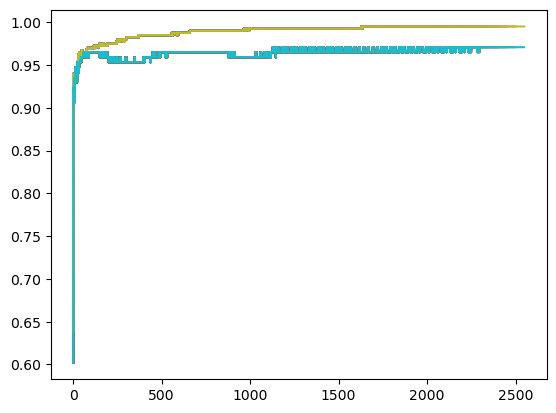

In [49]:
def training_data(node,y_train_one_hot,log_odds,p,test_log_odds=None,test_p=None):
    grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
    log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

    if test_log_odds != None:
        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)

        return log_odds,p,test_log_odds,test_p
    
    return log_odds,p

def get_order(stack,y_train_one_hot,log_odds,p,previous_sse):
    score = []
    
    for node in stack:
        log_odds,p = training_data(node,y_train_one_hot,log_odds,p)
        
        sse = np.sum(np.power(y_train_one_hot - p,2))
        score.append(previous_sse - sse)
        previous_sse = sse
    
    return [stack[i] for i in np.argsort(score)[::-1]]

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

fits = [i.estimator.loss for i in stack]
a = [stack[i] for i in np.argsort(fits)]

log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)
test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

# a = get_order(a,y_train_one_hot,log_odds,p,previous_sse=np.sum(np.power(y_train_one_hot - p,2)))

train_acc = []
test_acc = []

train_sse = []
test_sse = []


counts = []

for _ in range(50):
    score = []
    
    for i,node in enumerate(a):
        # node.estimator.lam = 300
        grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)


        train_sse.append(np.sum(np.power(y_train_one_hot - p,2)))
        test_sse.append(np.sum(np.power(y_test_one_hot - test_p,2)))
        # score.append(previous_sse - train_sse[-1])
        # previous_sse = train_sse[-1]


        pred = np.argmax(p,axis=1)
        train_acc.append(accuracy_score(pred,y_train))
        test_pred = np.argmax(test_p,axis=1)
        test_acc.append(accuracy_score(test_pred,y_test))
    
    # a = [a[i] for i in np.argsort(score)[::-1]]

    plt.plot(train_acc)
    plt.plot(test_acc)
    print(train_acc[-1],test_acc[-1],max(test_acc))

    # plt.plot(train_sse)
    # plt.plot(test_sse)
    print(train_sse[-1],test_sse[-1],min(test_sse))

    # plt.legend(["train","test"])
    # plt.show()
    

In [50]:
sum([n.numNode for n in stack])

93

              precision    recall  f1-score   support

           0    0.99219   1.00000   0.99608       254
           1    1.00000   0.98611   0.99301       144

    accuracy                        0.99497       398
   macro avg    0.99609   0.99306   0.99454       398
weighted avg    0.99501   0.99497   0.99497       398

              precision    recall  f1-score   support

           0    0.97115   0.98058   0.97585       103
           1    0.97015   0.95588   0.96296        68

    accuracy                        0.97076       171
   macro avg    0.97065   0.96823   0.96940       171
weighted avg    0.97075   0.97076   0.97072       171



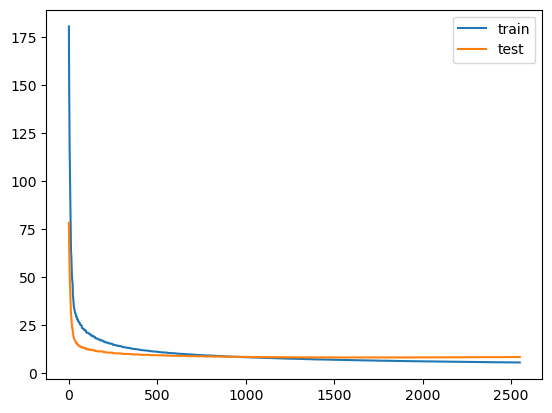

In [51]:
plt.plot(train_sse)
plt.plot(test_sse)
plt.legend(["train","test"])
print(classification_report(y_train,np.argmax(p,axis=1),digits=5))
print(classification_report(y_test,np.argmax(test_p,axis=1),digits=5))

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       144

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       103
           1       0.89      0.84      0.86        68

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



# XGBoost

In [54]:
import xgboost


In [55]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

print(classification_report(y_train,xgb.predict(X_train),digits=5))
print(classification_report(y_test,xgb.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - xgb.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - xgb.predict_proba(X_test),2)))

import json

def item_generator(json_input, lookup_key):
    if isinstance(json_input, dict):
        for k, v in json_input.items():
            if k == lookup_key:
                yield v
            else:
                yield from item_generator(v, lookup_key)
    elif isinstance(json_input, list):
        for item in json_input:
            yield from item_generator(item, lookup_key)

def tree_depth(json_text):
    json_input = json.loads(json_text)
    depths = list(item_generator(json_input, 'depth'))
    return max(depths) + 1 if len(depths) != 0 else 1


booster = xgb.get_booster()

tree_df = booster.trees_to_dataframe()
depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
len(depths),np.average(depths),len(tree_df)

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       254
           1    1.00000   1.00000   1.00000       144

    accuracy                        1.00000       398
   macro avg    1.00000   1.00000   1.00000       398
weighted avg    1.00000   1.00000   1.00000       398

              precision    recall  f1-score   support

           0    0.97087   0.97087   0.97087       103
           1    0.95588   0.95588   0.95588        68

    accuracy                        0.96491       171
   macro avg    0.96338   0.96338   0.96338       171
weighted avg    0.96491   0.96491   0.96491       171

train: 0.28997010758305697
test: 8.213116155531626


(100, 1.84, 556)

# GDBT

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train),digits=5))
print(classification_report(y_test,clf.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - clf.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - clf.predict_proba(X_test),2)))

len(clf.estimators_),sum([ est.tree_.node_count for ests in clf.estimators_ for est in ests])

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       254
           1    1.00000   1.00000   1.00000       144

    accuracy                        1.00000       398
   macro avg    1.00000   1.00000   1.00000       398
weighted avg    1.00000   1.00000   1.00000       398

              precision    recall  f1-score   support

           0    0.95192   0.96117   0.95652       103
           1    0.94030   0.92647   0.93333        68

    accuracy                        0.94737       171
   macro avg    0.94611   0.94382   0.94493       171
weighted avg    0.94730   0.94737   0.94730       171

train: 0.008758775185286328
test: 11.770394049050548


(100, 1460)